# Part 6 - Working with Custom Geocoders

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Geocoders-for-GIS-instances" data-toc-modified-id="Geocoders-for-GIS-instances-1">Geocoders for <code>GIS</code> instances</a></span></li><li><span><a href="#Create-a-Geocoder-instance-from-an-Item-or-a-URL" data-toc-modified-id="Create-a-Geocoder-instance-from-an-Item-or-a-URL-2">Create a Geocoder instance from an Item or a URL</a></span><ul class="toc-item"><li><span><a href="#Creating-a-geocoder-using-a-geocoding-service-item" data-toc-modified-id="Creating-a-geocoder-using-a-geocoding-service-item-2.1">Creating a geocoder using a geocoding service item</a></span></li><li><span><a href="#Creating-a-geocoder-using-a-URL" data-toc-modified-id="Creating-a-geocoder-using-a-URL-2.2">Creating a geocoder using a URL</a></span></li></ul></li><li><span><a href="#Specifying-a-particular-Geocoder-instance-with-a-GIS-object" data-toc-modified-id="Specifying-a-particular-Geocoder-instance-with-a-GIS-object-3">Specifying a particular Geocoder instance with a <code>GIS</code> object</a></span></li><li><span><a href="#Inspecting-properties-of-a-geocoder" data-toc-modified-id="Inspecting-properties-of-a-geocoder-4">Inspecting properties of a geocoder</a></span><ul class="toc-item"><li><span><a href="#Localized-input-field-names-in-addressFields" data-toc-modified-id="Localized-input-field-names-in-addressFields-4.1">Localized input field names in <code>addressFields</code></a></span></li><li><span><a href="#candidateFields-property" data-toc-modified-id="candidateFields-property-4.2"><code>candidateFields</code> property</a></span></li><li><span><a href="#locatorProperties" data-toc-modified-id="locatorProperties-4.3"><code>locatorProperties</code></a></span></li><li><span><a href="#capbilities-property" data-toc-modified-id="capbilities-property-4.4"><code>capbilities</code> property</a></span></li></ul></li><li><span><a href="#Geocoding-with-custom-geocoder" data-toc-modified-id="Geocoding-with-custom-geocoder-5">Geocoding with custom geocoder</a></span></li><li><span><a href="#Batch-geocoding-with-custom-geocoder" data-toc-modified-id="Batch-geocoding-with-custom-geocoder-6">Batch geocoding with custom geocoder</a></span></li><li><span><a href="#Reverse-geocoding-with-custom-geocoder" data-toc-modified-id="Reverse-geocoding-with-custom-geocoder-7">Reverse geocoding with custom geocoder</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8">Conclusions</a></span></li></ul></div>

## Geocoders for `GIS` instances
 
As previously mentioned in <a href="part1_what_is_geocoding.ipynb#How-geocoding-works?">Part 1</a>, `Geocoders` are tools that can find spatial coordinates of addresses, business names, places of interest and so on, and output points that can be visualized on a map, inserted as stops for a route, or loaded as input for spatial analysis. `Geocoders` can also used to generate batch results for a set of addresses, as well as for reverse geocoding, the process of determining the address at a particular x/y location.

Geocoders can come from many sources, e.g. Esri, Google Maps, and Epi Info 7.2, with various advantages and disadvantages with regard to ease of use, exporting maps, and the ability to geocode addresses outside of the United States. Keep in mind that geocoders are not always precise. Approximate latitudes and longitudes can be found for most addresses, especially in urban areas, but the exact latitude and longitude can vary by a few decimal points depending on which geocoder you use. 

A `GIS` includes one or more geocoders. By default it provides access to the `ArcGIS World Geocoding Service`, and the `geocoding` module provides a `Geocoder` class to interact with that service. You can also construct `Geocoder` objects from your GIS's custom geocoding service items or from the URL to a geocoding service. Further, the list of geocoders registered with the `GIS` can be queried using `get_geocoders()`, a method that returns a list of Geocoder instances.

In the example below, there are more than one registered Geocoders with the `GIS`, and the first one uses the `Esri World Geocoding Service` for geocoding:

In [9]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders, geocode

gis = GIS(profile="your_enterprise_profile")

In [8]:
get_geocoders(gis)

[<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">,
 <Geocoder url:"https://datascienceqa.esri.com/portal/sharing/servers/73846618ad4b4f539e3646556a0780db/rest/services/World/GeocodeServer">,
 <Geocoder url:"https://datascienceqa.esri.com/server/rest/services/AtlantaLocator/GeocodeServer">]


## Create a Geocoder instance from an Item or a URL
 

### Creating a geocoder using a geocoding service item

Geocoding services can be published as items in the `GIS`. An instance of the geocoder can also be constructed by passing in a reference to these items from the `GIS` to the Geocoder's constructor `Geocoder.fromitem()`:

In [86]:
from IPython.display import display

arcgis_online = GIS()
items = arcgis_online.content.search('Geocoder', 'geocoding service', max_items=3)
for item in items: 
    display(item)
    
# construct a geocoder using the 2nd geocoding service item
world_geocoder = Geocoder.fromitem(items[1])
world_geocoder

<Item title:"Esri Nederland BAG Geocoder" type:Geocoding Layer owner:Esri_NL_Content>

<Item title:"World Geocoding" type:Geocoding Layer owner:esri>

<Item title:"Vue France du service de géocodage mondial d'ArcGIS" type:Geocoding Layer owner:rgarnier_esrifrance>

<Geocoder url:"https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer">

### Creating a geocoder using a URL

Geocoders may also be created using the constructor `Geocoder(location=..., gis=None)` by passing in their location, such as a url to a Geocoding Service. If the geocoding service is a secure service, pass in the `GIS` to which it is federated with as the `gis` parameter:

In [15]:
geocoder_url = 'https://services.arcgisonline.nl/arcgis/rest/services/Geocoder_BAG_RD/GeocodeServer'
esrinl_geocoder = Geocoder(geocoder_url, gis)
esrinl_geocoder

<Geocoder url:"https://services.arcgisonline.nl/arcgis/rest/services/Geocoder_BAG_RD/GeocodeServer">

## Specifying a particular Geocoder instance with a `GIS` object

In this section, we will talk about specifying a particular `Geocoder` instance when there are multiple available (`geocode(geocoder=`<val>`)`)

The `geocoder` paramter is optional for `geocode` function, representing whichever geocoder to be used. If not specified, the active `GIS`'s first geocoder is used. We can see from the example below, that with different geocoders, the geocoded results for the same address might be different, due to the difference of spatial reference, geocoder coverage and precision, etc.

In [18]:
results = geocode('Raadhuisstraat 52, 1016 Amsterdam',  geocoder=esrinl_geocoder)
results[0]['location']

{'x': 120842.00295538307, 'y': 487472.9997233087, 'z': 0}

In [28]:
esrinl_geocoder.properties.spatialReference

{
  "wkid": 28992,
  "latestWkid": 28992
}

The geocoded result is different when using another geocoder (as shown below), mainly due to that two geocoders are in different spatial reference systems.

In [22]:
results = geocode('Raadhuisstraat 52, 1016 Amsterdam',  geocoder=world_geocoder)
results[0]['location']

{'x': 4.885602819214398, 'y': 52.374067391443106}

In [27]:
world_geocoder.properties.spatialReference

{
  "wkid": 4326,
  "latestWkid": 4326
}

##  Inspecting properties of a geocoder 

`Geocoders` have several properties and they can be accessed on `geocoder.properties`. You can find the basic walk through of these properties in <a href="part1_what_is_geocoding.ipynb#Properties-of-the-geocoder-class">Part 1</a>. Here, let's look at some other details of geocoder properties.

In [37]:
keys_list = [prop_name for prop_name in world_geocoder.properties.keys()]
display(keys_list)

['currentVersion',
 'serviceDescription',
 'addressFields',
 'categories',
 'singleLineAddressField',
 'candidateFields',
 'spatialReference',
 'locatorProperties',
 'detailedCountries',
 'countries',
 'capabilities']

### Localized input field names in `addressFields`
Developers integrating the geocoder into their application may need to know the appropriate input field names to use for 
the language and country of their users. This information can be obtained using the `localizedNames` parameter of the 
address field. More information on this, as well as the `recognizedNames` parameter, is available in the Foreign language 
field names (`World Geocoding Service`) <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-localized-input-field-names.htm#ESRI_SECTION1_420C0A38D36546EDB1FC114048757B3E">documentation</a>.

For example, the code below lists the supported address fields and the corresponding input field names in `Hindi` or `Simplified Chinese`:

In [55]:
for addrfld in world_geocoder.properties.addressFields:
    print(addrfld['name'], end='')
    print(": " + str(addrfld['localizedNames']['hi'] if 'hi' in addrfld['localizedNames'] else '-'))

Address: पता या स्थान
Address2: पता2
Address3: पता3
Neighborhood: आस-पड़ोस
City: शहर
Subregion: उपक्षेत्र
Region: क्षेत्र
Postal: डाक-सम्बन्धी
PostalExt: डाक विस्तार
CountryCode: देश


In [56]:
for addrfld in world_geocoder.properties.addressFields:
    print(addrfld['name'], end='')
    print(": " + str(addrfld['localizedNames']['zh'] if 'zh' in addrfld['localizedNames'] else '-'))

Address: 住址
Address2: -
Address3: -
Neighborhood: 县
City: 市
Subregion: 行政區
Region: 省或自治区
Postal: 邮编
PostalExt: -
CountryCode: 国家代码


### `candidateFields` property
The `CandidateFields` property of the `geocoder` contains the fields that are returned for each candidate.

In [68]:
for addrfld in world_geocoder.properties.candidateFields:
    req_str = ""
    if addrfld["required"]:
        req_str = "*"
    if "length" in addrfld:
        print(addrfld["name"], "(", addrfld["length"], ")", req_str)
    else:
        print(addrfld["name"], req_str)

Loc_name ( 20 ) 
Shape *
Status ( 1 ) *
Score *
Match_addr ( 500 ) *
LongLabel ( 500 ) 
ShortLabel ( 500 ) 
Addr_type ( 20 ) 
Type ( 50 ) 
PlaceName ( 200 ) 
Place_addr ( 500 ) 
Phone ( 25 ) 
URL ( 250 ) 
Rank 
AddBldg ( 125 ) 
AddNum ( 50 ) 
AddNumFrom ( 50 ) 
AddNumTo ( 50 ) 
AddRange ( 100 ) 
Side ( 1 ) 
StPreDir ( 5 ) 
StPreType ( 50 ) 
StName ( 125 ) 
StType ( 30 ) 
StDir ( 20 ) 
BldgType ( 20 ) 
BldgName ( 50 ) 
LevelType ( 20 ) 
LevelName ( 50 ) 
UnitType ( 20 ) 
UnitName ( 50 ) 
SubAddr ( 250 ) 
StAddr ( 300 ) 
Block ( 120 ) 
Sector ( 120 ) 
Nbrhd ( 120 ) 
District ( 120 ) 
City ( 120 ) 
MetroArea ( 120 ) 
Subregion ( 120 ) 
Region ( 120 ) 
RegionAbbr ( 50 ) 
Territory ( 120 ) 
Zone ( 100 ) 
Postal ( 20 ) 
PostalExt ( 10 ) 
Country ( 30 ) 
LangCode ( 5 ) 
Distance 
X 
Y 
DisplayX 
DisplayY 
Xmin 
Xmax 
Ymin 
Ymax 
ExInfo ( 500 ) 


### `locatorProperties`
The geocoder has several important properties that are specified in the `locatorProperties`.

These include the maximum number of addresses that can be geocoded in a single batch geocoding method call. The `MaxBatchSize` property defines this limit. For instance, if `MaxBatchSize=2000`, and 3000 addresses are passed in as input to the `batch_geocode()` method, only the first 2000 will be geocoded.

The `SuggestedBatchSize` property is also useful, as it specifies the optimal number of addresses to include in a single batch request.

The code below lists these useful locator properties.

In [50]:
world_geocoder.properties.locatorProperties

{
  "MinimumCandidateScore": "60",
  "UICLSID": "{AE5A3A0E-F756-11D2-9F4F-00C04F8ED1C4}",
  "MinimumMatchScore": "60",
  "IntersectionConnectors": "& @ | and",
  "SuggestedBatchSize": 150,
  "MaxBatchSize": 1000,
  "LoadBalancerTimeOut": 60,
  "isAGOWorldLocator": true,
  "WriteXYCoordFields": "TRUE",
  "WriteStandardizedAddressField": "FALSE",
  "WriteReferenceIDField": "FALSE",
  "WritePercentAlongField": "FALSE",
  "LocatorVersion": "11.0",
  "supportsBatchOutFields": "True"
}

### `capbilities` property

Not all geocoders support `reverse_geocode`, `batch_geocode`, and etc. Before calling these methods with `arcgis.geocoding` module, try to query the geocoder's `capabilities` first.

In [49]:
world_geocoder.properties.capabilities

'Geocode,ReverseGeocode,Suggest'

## Geocoding with custom geocoder

When the `geocoder` parameter is not applied, the `geocode()` function adopts the first registered geocoding service with the currently active `GIS`; when specified, `geocode()` uses the custom geocoder input with the parameter.

In [78]:
results = geocode('Nieuwezijds Voorburgwal 147, 1012 RJ Amsterdam',  
                  geocoder=esrinl_geocoder,
                  out_sr=4326, 
                  lang_code="DUT")
results[0]

{'address': 'Nieuwezijds Voorburgwal 147, 1012 RJ Amsterdam',
 'location': {'x': 4.89089880263342, 'y': 52.37316406098895, 'z': 0},
 'score': 100,
 'attributes': {'Loc_name': 'NLD_Adreslocat',
  'Score': 100,
  'Match_addr': 'Nieuwezijds Voorburgwal 147, 1012 RJ Amsterdam',
  'Addr_type': 'PointAddress',
  'AddNum': '147',
  'Side': '',
  'StAddr': 'Nieuwezijds Voorburgwal 147',
  'StPreType': '',
  'StName': 'Nieuwezijds Voor',
  'StType': 'burgwal',
  'Postal': '1012 RJ',
  'City': 'Amsterdam',
  'Subregion': 'Amsterdam',
  'Region': 'Noord-Holland',
  'Country': '',
  'LangCode': '',
  'Distance': 0,
  'DisplayX': 121202.002772,
  'DisplayY': 487369.998074,
  'Xmin': 121102.002772,
  'Xmax': 121302.002772,
  'Ymin': 487269.998074,
  'Ymax': 487469.998074,
  'User_fld': '0363200000218908',
  'Nbrhd': '',
  'Rank': ''},
 'extent': {'xmin': 4.889420327191998,
  'ymin': 52.37225916910978,
  'xmax': 4.892377218593795,
  'ymax': 52.374068935465296}}

## Batch geocoding with custom geocoder

With `batch_geocode()`, the `geocoder` parameter is still optional, representing the geocoder to be used. If not specified, the active GIS's first geocoder is used.

We can use a combination of the `geocoder` and `out_sr` parameters to get the geocoded results using custom geocoder and output in the desired spatial reference.

In [79]:
from arcgis.geocoding import batch_geocode

In [82]:
addresses = ["Kalverstraat 92, 1012 PH Amsterdam",
             "Plantage Middenlaan 2a, 1018 DD Amsterdam",
             "Meeuwenlaan 88, 1021 JK Amsterdam"]

In [101]:
geocoded = batch_geocode(addresses, geocoder = get_geocoders(gis)[0],
                         out_sr = 28992)
for res in geocoded:
    print(res["location"], res["attributes"]["Match_addr"])
    map1.draw(res["location"])

{'x': 123163.55689999834, 'y': 488606.73910000175} Meeuwenlaan 88, 1021 JK Amsterdam
{'x': 122329.4822999984, 'y': 486564.5471000001} Plantage Middenlaan 2A, 1018 DD Amsterdam
{'x': 121159.63549999893, 'y': 486892.5181999989} Kalverstraat 92, 1012 PH Amsterdam


When drawing in a map, let's set `as_featureset=True` to have the `geocode` function return results as a FeatureSet which is easier to plot on a map.


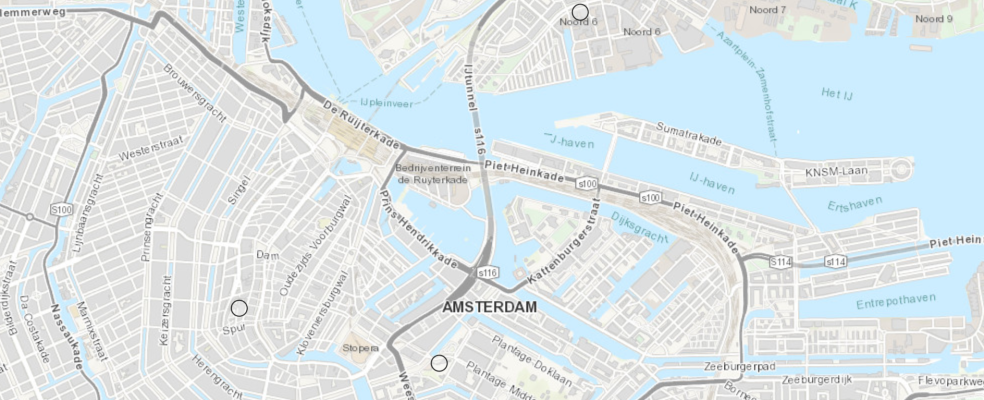

In [106]:
map1 = gis.map("Amsterdam")
map1.zoom = 14
map1.center = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
               'x': 546847.186161375,
               'y': 6868318.370682971}
map1

In [104]:
geocoded_fs = batch_geocode(addresses, geocoder = get_geocoders(gis)[0],
                            as_featureset=True)
map1.draw(geocoded_fs)

## Reverse geocoding with custom geocoder

With `reverse_geocode()`, the `geocoder=<VAL>` parameter is still optional, representing the geocoder to be used. If not specified, the active GIS's first geocoder is used.

We can use a combination of the `geocoder` and `feature_types` parameters to convert coordinates to addresses using custom geocoder and return the nearest point of interest.

In [117]:
from arcgis.geocoding import reverse_geocode
reverse_geocode({'x': 4.885602819214398, 'y': 52.374067391443106}, 
                geocoder = get_geocoders(gis)[0],
                feature_types="POI")

{'address': {'Match_addr': 'DHB',
  'LongLabel': 'DHB, Raadhuisstraat 48, 1016 DG Amsterdam, NLD',
  'ShortLabel': 'DHB',
  'Addr_type': 'POI',
  'Type': 'Bank',
  'PlaceName': 'DHB',
  'AddNum': '48',
  'Address': 'Raadhuisstraat 48',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Amsterdam-Centrum',
  'District': '',
  'City': 'Amsterdam',
  'MetroArea': '',
  'Subregion': 'Amsterdam',
  'Region': 'Noord-Holland',
  'Territory': '',
  'Postal': '1016 DG',
  'PostalExt': 'DG',
  'CountryCode': 'NLD'},
 'location': {'x': 4.885660003895202,
  'y': 52.373920062179,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

<div class="inner_cell">
    <div class="text_cell_render border-box-sizing rendered_html">
        <blockquote>
            <p>Note that, the input location paramter (the required list/Point Geometry) has to be in the same spatial reference as stated by the `geocoder.properties.spatialReference`. When using different geocoders, the results of `reverse_geocode` can be varied.</p>
        </blockquote>
    </div>
</div>

In [118]:
reverse_geocode({'x': 120842.00295538307, 'y': 487472.9997233087, 'z': 0}, 
                geocoder = esrinl_geocoder,
                feature_types="POI")

{'address': {'Adres': 'Raadhuisstraat 52A',
  'Postcode': '1016 DG',
  'Woonplaats': 'Amsterdam',
  'Match_addr': 'Raadhuisstraat 52A, 1016 DG Amsterdam',
  'Loc_name': 'NLD_Adreslocat'},
 'location': {'x': 120842.00295538307,
  'y': 487472.9997233087,
  'z': 0,
  'spatialReference': {'wkid': 28992, 'latestWkid': 28992}}}

## Conclusions

In Part 6 of the geocoding series, we have inspected the `Geocoder` object, browsed its important properties, and explored ways to `geocode`, `batch_geocode`, and `reverse_geocode` with custom geocoders. Next, in Part 7, let's discuss how to use utility functions for geocoding.

<a href = "part6_custom_geocoders.ipynb#Inspecting-geocoders-and-working-with-custom-geocoders">Back to Top</a>